In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
from sklearn.linear_model import LinearRegression as LR
import random as rnd
from random import sample

In [62]:
census = pd.read_csv("CensusAndExpectancyIL.csv")

In [63]:
census.head(5)

,Unnamed: 0,Tract,FIPS,Area (Land),Total Population:,% Total Population: White Alone,% Total Population: Black or African American Alone,Population 25 Years and Over:,Civilian Population in Labor Force 16 Years and Over:,% Civilian Population in Labor Force 16 Years and Over: Employed,...,% Total: No Health Insurance Coverage,% Total: with Health Insurance Coverage,% Total: with Health Insurance Coverage: Public Health Coverage,% Total: with Health Insurance Coverage: Private Health Insurance,"% Households: Less than $39,999","% Households: $40,000 to $74,999","% Households: $75,000 or More",% High School or Less,% Bachelor's or More,Life Expectancy
0,0,Adams County 0001.00,17001000100,14087146,4607,90.71,6.19,3425,2329,92.79,...,3.15,96.85,48.10,68.76,35.96,34.71,29.32,40.52,21.55,85.3
1,1,Adams County 0002.01,17001000201,3206319,2003,90.66,6.54,1365,990,97.68,...,6.44,93.56,40.49,66.45,44.91,23.83,31.25,39.41,24.91,78.1
2,2,Adams County 0002.02,17001000202,1514956,2391,84.53,10.25,1541,1409,93.12,...,10.87,89.13,28.69,71.14,36.50,43.86,19.64,39.00,16.55,78.2
3,3,Adams County 0004.00,17001000400,4443142,3314,77.46,13.70,2311,1355,95.79,...,4.34,95.66,55.61,49.66,51.47,27.92,20.61,59.15,9.65,66.2
4,4,Adams County 0005.00,17001000500,1262517,2154,84.68,8.17,1458,839,96.31,...,7.33,92.67,50.08,50.66,50.82,32.92,16.26,52.81,13.17,71.6


# QUESTION 1

In [64]:
adams_tract = census[census['Tract'].str.startswith('Adams')].index
adams_tract_df = census.loc[census['Tract'].str.startswith('Adams')]
census.drop(adams_tract , inplace=True)
census.head(5)

,Unnamed: 0,Tract,FIPS,Area (Land),Total Population:,% Total Population: White Alone,% Total Population: Black or African American Alone,Population 25 Years and Over:,Civilian Population in Labor Force 16 Years and Over:,% Civilian Population in Labor Force 16 Years and Over: Employed,...,% Total: No Health Insurance Coverage,% Total: with Health Insurance Coverage,% Total: with Health Insurance Coverage: Public Health Coverage,% Total: with Health Insurance Coverage: Private Health Insurance,"% Households: Less than $39,999","% Households: $40,000 to $74,999","% Households: $75,000 or More",% High School or Less,% Bachelor's or More,Life Expectancy
17,17,Alexander County 9576.00,17003957600,282415331,2041,82.17,16.56,1607,755,96.82,...,6.48,93.52,54.09,51.15,42.99,35.78,21.24,57.37,10.01,75.7
18,18,Alexander County 9577.00,17003957700,275569419,1854,82.52,16.67,1176,554,87.36,...,10.57,89.43,53.67,46.28,46.37,31.02,22.60,51.87,8.51,77.1
19,19,Alexander County 9578.00,17003957800,41485531,1352,27.59,69.53,848,513,91.81,...,6.36,93.64,68.42,41.12,60.26,35.86,3.89,42.57,16.28,74.2
20,20,Alexander County 9579.00,17003957900,10197484,764,29.19,68.06,657,283,90.81,...,7.69,92.31,70.68,45.72,77.75,11.93,10.33,57.53,8.98,70.9
21,21,Bond County 9512.00,17005951200,251008345,3026,94.08,3.70,2303,1291,97.60,...,12.82,87.18,40.41,62.93,31.12,32.08,36.80,44.07,19.45,77.7


In [69]:
model = LR()
outcome = "Life Expectancy"
predictors = ["% Total: with Health Insurance Coverage", "% Total: with Health Insurance Coverage: Public Health Coverage", \
              "% Civilian Population in Labor Force 16 Years and Over: Employed", "% Households: with Social Security Income",\
              "% Bachelor's or More"]
norm_census = pd.DataFrame()
for prd in predictors:
    norm_census[prd] = (census[prd]-census[prd].mean())/census[prd].std()
norm_census[outcome] = (census[outcome]-census[outcome].mean())/census[outcome].std()


model.fit(norm_census[predictors], norm_census[outcome])

print(f'Intercept: {model.intercept_:.3f}')
print('Coefficients:')
for prd, coef in zip(predictors, model.coef_):
    print(f'{prd}:{coef:.3f}')


Intercept: 0.000
Coefficients:
% Total: with Health Insurance Coverage:-0.054
% Total: with Health Insurance Coverage: Public Health Coverage:-0.469
% Civilian Population in Labor Force 16 Years and Over: Employed:0.179
% Households: with Social Security Income:0.183
% Bachelor's or More:0.234


In [65]:
adams_tract_df

,Unnamed: 0,Tract,FIPS,Area (Land),Total Population:,% Total Population: White Alone,% Total Population: Black or African American Alone,Population 25 Years and Over:,Civilian Population in Labor Force 16 Years and Over:,% Civilian Population in Labor Force 16 Years and Over: Employed,...,% Total: No Health Insurance Coverage,% Total: with Health Insurance Coverage,% Total: with Health Insurance Coverage: Public Health Coverage,% Total: with Health Insurance Coverage: Private Health Insurance,"% Households: Less than $39,999","% Households: $40,000 to $74,999","% Households: $75,000 or More",% High School or Less,% Bachelor's or More,Life Expectancy
0,0,Adams County 0001.00,17001000100,14087146,4607,90.71,6.19,3425,2329,92.79,...,3.15,96.85,48.10,68.76,35.96,34.71,29.32,40.52,21.55,85.3
1,1,Adams County 0002.01,17001000201,3206319,2003,90.66,6.54,1365,990,97.68,...,6.44,93.56,40.49,66.45,44.91,23.83,31.25,39.41,24.91,78.1
2,2,Adams County 0002.02,17001000202,1514956,2391,84.53,10.25,1541,1409,93.12,...,10.87,89.13,28.69,71.14,36.50,43.86,19.64,39.00,16.55,78.2
3,3,Adams County 0004.00,17001000400,4443142,3314,77.46,13.70,2311,1355,95.79,...,4.34,95.66,55.61,49.66,51.47,27.92,20.61,59.15,9.65,66.2
4,4,Adams County 0005.00,17001000500,1262517,2154,84.68,8.17,1458,839,96.31,...,7.33,92.67,50.08,50.66,50.82,32.92,16.26,52.81,13.17,71.6
5,5,Adams County 0006.00,17001000600,2730589,4284,91.99,4.51,2932,2679,94.62,...,4.16,95.84,33.42,74.69,30.84,32.14,37.03,26.30,35.27,82.1
6,6,Adams County 0007.00,17001000700,1356914,1114,88.06,9.07,942,414,96.62,...,3.22,96.78,69.08,42.50,82.88,11.76,5.36,65.71,11.36,69.8
7,7,Adams County 0008.00,17001000800,2367424,2297,85.94,11.62,1696,1007,90.17,...,12.47,87.53,60.82,41.37,75.03,11.65,13.34,71.11,3.89,68.2
8,8,Adams County 0009.00,17001000900,1797932,2738,93.46,2.08,1610,1590,88.62,...,8.07,91.93,35.54,65.12,48.51,30.91,20.59,34.53,22.98,78.9
9,9,Adams County 0010.01,17001001001,1629646,3389,97.55,1.68,2301,1860,97.31,...,1.68,98.32,38.09,75.75,33.89,30.86,35.25,39.47,22.21,77.7


In [70]:
norm_adams = pd.DataFrame()
for prd in predictors:
    norm_adams[prd] = (adams_tract_df[prd]-adams_tract_df[prd].mean())/adams_tract_df[prd].std()
norm_adams[outcome] = (adams_tract_df[outcome]-adams_tract_df[outcome].mean())/adams_tract_df[outcome].std()

In [71]:
fitted = model.predict(norm_adams[predictors])
fitted = fitted * census[outcome].std() + census[outcome].mean()

[Text(0.5, 1.0, '$\\rho$ = 0.80 ,relative_rms_error = 0.68')]

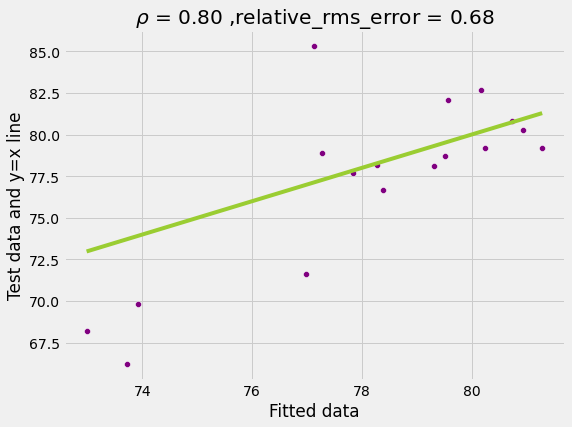

In [77]:
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x=fitted, y=adams_tract_df[outcome], color="purple")
sns.lineplot(x=[min(fitted), max(fitted)], y=[min(fitted), max(fitted)],color='yellowgreen', dashes=True)
ax.set(xlabel='Fitted data', ylabel='Test data and y=x line')
rho = np.corrcoef(fitted, adams_tract_df[outcome])[0,1]
rms_err = np.sqrt(((fitted - adams_tract_df[outcome])**2).mean())
rel_rms_err = rms_err / adams_tract_df[outcome].std()
ax.set(title=r'$\rho$ = %.2f ,relative_rms_error = %.2f'%(rho, rel_rms_err))

There seems to be a bias. For the data points on the right side of the graph (above 77), the predictions seem about right. However, for the data points on the left, there seems to be overprediction.

# QUESTION 2

In [84]:
#MODEL 1
outcome = "Life Expectancy"
predictors = ["% Total: with Health Insurance Coverage", "% Total: with Health Insurance Coverage: Public Health Coverage", \
              "% Civilian Population in Labor Force 16 Years and Over: Employed", "% Households: with Social Security Income",\
              "% Bachelor's or More"]

import statsmodels.regression.linear_model as sm_lr
import statsmodels.tools.eval_measures as sm_eval

y = norm_census[outcome]
xs = norm_census[predictors]

sm_model = sm_lr.OLS(y, xs)
sm_results = sm_model.fit()
print(sm_results.summary())

sm_fitted = sm_results.predict(norm_adams[predictors])
sm_rmse = sm_eval.rmse(sm_fitted, norm_adams[outcome])
print('sm_R-squared = %.2f'%(sm_results.rsquared))
print('sm_rmse = %.2f'%(sm_rmse))


                                 OLS Regression Results                                
Dep. Variable:        Life Expectancy   R-squared (uncentered):                   0.497
Model:                            OLS   Adj. R-squared (uncentered):              0.496
Method:                 Least Squares   F-statistic:                              539.8
Date:                Tue, 11 Oct 2022   Prob (F-statistic):                        0.00
Time:                        22:10:28   Log-Likelihood:                         -2946.8
No. Observations:                2740   AIC:                                      5904.
Df Residuals:                    2735   BIC:                                      5933.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                                                                       coef    std err          t      P>|t|      [0.025

In [88]:
#MODEL 2
outcome = "Life Expectancy"
predictors = ["% Total: with Health Insurance Coverage", "% Total: with Health Insurance Coverage: Public Health Coverage", \
            "% Households: with Social Security Income",\
              "% Bachelor's or More"]

import statsmodels.regression.linear_model as sm_lr
import statsmodels.tools.eval_measures as sm_eval

y = norm_census[outcome]
xs = norm_census[predictors]

sm_model = sm_lr.OLS(y, xs)
sm_results = sm_model.fit()
print(sm_results.summary())

sm_fitted = sm_results.predict(norm_adams[predictors])
sm_rmse = sm_eval.rmse(sm_fitted, norm_adams[outcome])
print('sm_R-squared = %.2f'%(sm_results.rsquared))
print('sm_rmse = %.2f'%(sm_rmse))

                                 OLS Regression Results                                
Dep. Variable:        Life Expectancy   R-squared (uncentered):                   0.478
Model:                            OLS   Adj. R-squared (uncentered):              0.478
Method:                 Least Squares   F-statistic:                              627.1
Date:                Tue, 11 Oct 2022   Prob (F-statistic):                        0.00
Time:                        22:12:05   Log-Likelihood:                         -2996.0
No. Observations:                2740   AIC:                                      6000.
Df Residuals:                    2736   BIC:                                      6024.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                                                                      coef    std err          t      P>|t|      [0.025 

In [86]:
#MODEL 3

outcome = "Life Expectancy"
predictors = ["% Total: with Health Insurance Coverage", "% Total: with Health Insurance Coverage: Public Health Coverage", \
              "% Civilian Population in Labor Force 16 Years and Over: Employed",\
              "% Bachelor's or More"]

import statsmodels.regression.linear_model as sm_lr
import statsmodels.tools.eval_measures as sm_eval

y = norm_census[outcome]
xs = norm_census[predictors]

sm_model = sm_lr.OLS(y, xs)
sm_results = sm_model.fit()
print(sm_results.summary())

sm_fitted = sm_results.predict(norm_adams[predictors])
sm_rmse = sm_eval.rmse(sm_fitted, norm_adams[outcome])
print('sm_R-squared = %.2f'%(sm_results.rsquared))
print('sm_rmse = %.2f'%(sm_rmse))

                                 OLS Regression Results                                
Dep. Variable:        Life Expectancy   R-squared (uncentered):                   0.475
Model:                            OLS   Adj. R-squared (uncentered):              0.474
Method:                 Least Squares   F-statistic:                              618.1
Date:                Tue, 11 Oct 2022   Prob (F-statistic):                        0.00
Time:                        22:11:30   Log-Likelihood:                         -3005.5
No. Observations:                2740   AIC:                                      6019.
Df Residuals:                    2736   BIC:                                      6043.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                                                                       coef    std err          t      P>|t|      [0.025

In [87]:
#MODEL 4
outcome = "Life Expectancy"
predictors = ["% Total: with Health Insurance Coverage", "% Total: with Health Insurance Coverage: Public Health Coverage", \
              "% Civilian Population in Labor Force 16 Years and Over: Employed", "% Households: with Social Security Income"]

import statsmodels.regression.linear_model as sm_lr
import statsmodels.tools.eval_measures as sm_eval

y = norm_census[outcome]
xs = norm_census[predictors]

sm_model = sm_lr.OLS(y, xs)
sm_results = sm_model.fit()
print(sm_results.summary())

sm_fitted = sm_results.predict(norm_adams[predictors])
sm_rmse = sm_eval.rmse(sm_fitted, norm_adams[outcome])
print('sm_R-squared = %.2f'%(sm_results.rsquared))
print('sm_rmse = %.2f'%(sm_rmse))

                                 OLS Regression Results                                
Dep. Variable:        Life Expectancy   R-squared (uncentered):                   0.475
Model:                            OLS   Adj. R-squared (uncentered):              0.474
Method:                 Least Squares   F-statistic:                              618.0
Date:                Tue, 11 Oct 2022   Prob (F-statistic):                        0.00
Time:                        22:11:50   Log-Likelihood:                         -3005.6
No. Observations:                2740   AIC:                                      6019.
Df Residuals:                    2736   BIC:                                      6043.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                                                                       coef    std err          t      P>|t|      [0.025

The ’best’ model selected from the ones examined is the MODEL 2. Model 2's RMSE is the smallest among them, and its R2 is the second highest. However, compared to the model with the highest R2 score, MODEL 2 has less coefficents and a smaller RMSE value. In all of the models, all coefficients are 0 except the "% Total: with Health Insurance Coverage" coefficient. However, MODEL 2's "% Total: with Health Insurance Coverage" coefficient p-value is 0.018, smaller than MODEL 3 and MODEL 4's coefficient p-values. MODEL 1's coef. p-value is even smaller; however, models with fewer coefficients are prefered. So, MODEL 2 is chosen over MODEL 1. 